In [29]:
import pandas as pd 
def process_data(src_path, #处理哪个文件 A1\A2\...
                 dest_path, #处理完的数据放到哪里
                 input_seq_len, # 输入多长的连续月数的数据
                 output_seq_len, # 预测出后面多长的连续月数的数据
                 nonan_sample_nums #一共有多少个非nan样本，即有数据的样本
                 ):
    data = pd.read_excel(src_path)
    data['year'] = data['月份']//100
    data['month'] = data['月份']%100 
    data = data[['year','month','销量（箱）','金额（元）']]
    data = data.values.tolist()[:nonan_sample_nums]
    
    # final_data = []
    # for i in range()
    
process_data('./source_data/A1.xlsx',20,20,117)


[[2011.0, 1.0, 265.836, 4785048.0], [2011.0, 2.0, 72.268, 1300824.0], [2011.0, 3.0, 96.396, 1735128.0], [2011.0, 4.0, 76.4, 1375200.0], [2011.0, 5.0, 101.368, 1824624.0], [2011.0, 6.0, 133.244, 2398392.0], [2011.0, 7.0, 108.796, 1958328.0], [2011.0, 8.0, 145.436, 2617848.0], [2011.0, 9.0, 170.404, 3067272.0], [2011.0, 10.0, 86.544, 1557792.0], [2011.0, 11.0, 77.048, 1386864.0], [2011.0, 12.0, 63.352, 1140336.0], [2012.0, 1.0, 263.3, 4739400.0], [2012.0, 2.0, 79.06, 1423080.0], [2012.0, 3.0, 113.96, 2051280.0], [2012.0, 4.0, 62.112, 1118016.0], [2012.0, 5.0, 104.932, 1888776.0], [2012.0, 6.0, 81.092, 1459656.0], [2012.0, 7.0, 106.08, 1909440.0], [2012.0, 8.0, 218.172, 3927096.0], [2012.0, 9.0, 127.784, 2300112.0], [2012.0, 10.0, 93.024, 1674432.0], [2012.0, 11.0, 110.88, 1995840.0], [2012.0, 12.0, 98.824, 1778832.0], [2013.0, 1.0, 308.18, 5547240.0], [2013.0, 2.0, 88.1, 1585800.0], [2013.0, 3.0, 97.504, 1755072.0], [2013.0, 4.0, 86.896, 1564128.0], [2013.0, 5.0, 132.644, 2387592.0], [20

In [17]:
import pandas as pd 
data = pd.read_excel('./source_data/A5.xlsx')
year = (data['月份']//100).values
month = (data['月份']%100).values
is_train = (data['金额（元）']>=0).values
L = len(year)
for i in range(L-1):
    if year[i]==year[i+1]:
        if month[i]+1 != month[i+1]:
            print("Pre:%d-%d,Now:%d-%d,IsTrain:%d"%(year[i],month[i],year[i+1],month[i+1],is_train[i+1]))
    elif year[i]+1 != year[i+1]:
            print("Pre:%d-%d,Now:%d-%d,IsTrain:%d"%(year[i],month[i],year[i+1],month[i+1],is_train[i+1]))
    else:
        if not (month[i]==12 and month[i+1]==1):
            print("Pre:%d-%d,Now:%d-%d,IsTrain:%d"%(year[i],month[i],year[i+1],month[i+1],is_train[i+1]))



Pre:2018-8,Now:2023-1,IsTrain:1
Pre:2023-3,Now:2023-6,IsTrain:0
Pre:2023-11,Now:2024-1,IsTrain:0


<AxesSubplot:xlabel='date'>

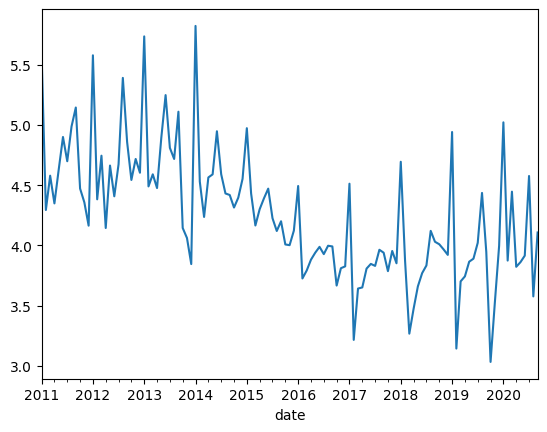

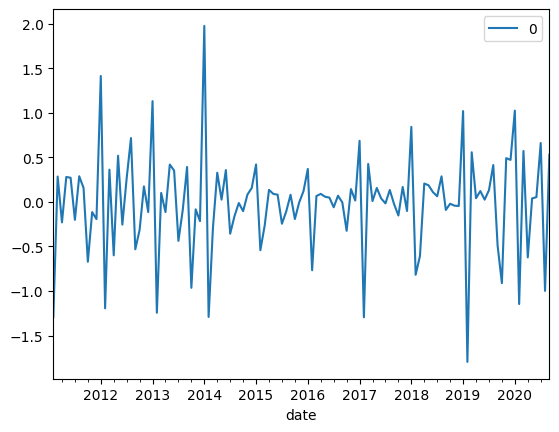

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
data = pd.read_excel('./source_data/A1backup.xlsx')
data.columns = ['date1','id1','id2','sales','values']
data['date']=pd.to_datetime(data['date1'],format="%Y%m")
data = data[data['sales']>=0]
# print(data[-23:])

data['sales']=data['sales'].apply(np.log1p)
data.set_index('date',inplace=True)
data['sales'].plot()

def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)
diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]

diff_data.plot()

In [2]:
L = [[91,2],[94,3],[93,3],[90,3],[85,3],[94,3],[92,3],[83,2],[95,0.5],[86,0.5],[100,3],[86,2]]
sc = 0 
sx = 0
for [a,b] in L:
    sx += b
    sc += a*b 
print(sc/sx)
print(sx)

91.23214285714286
28.0
